- Nama : Rizky Mardhatillah

- ID_Student : PYTN-KS019-022
  
- SIB Batch 5 Kampus Merdeka

# Clustering Credit Card Dataset
Projects Overview
Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.
Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

## Import pustaka dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import fungsi dari scikit-learn

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Menyembunyikan semua peringatan (warnings)
warnings.filterwarnings('ignore')

## Data loading

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df[df['PRC_FULL_PAYMENT'] == 1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.0,12
83,C10087,42.464430,0.545455,396.00,0.00,396.00,0.000000,0.500000,0.000000,0.416667,0.0,0,12,1200.0,725.606194,140.809454,1.0,12
85,C10089,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.0,0,22,16500.0,1275.229436,171.357189,1.0,12
98,C10103,4.708041,0.363636,79.00,0.00,79.00,0.000000,0.250000,0.000000,0.166667,0.0,0,3,7000.0,217.820198,121.781205,1.0,12
114,C10119,175.341651,0.818182,1508.90,1252.36,256.54,0.000000,0.666667,0.416667,0.333333,0.0,0,14,5000.0,1884.227778,136.639824,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8908,C19149,21.357267,1.000000,212.87,0.00,212.87,0.000000,1.000000,0.000000,0.857143,0.0,0,7,1000.0,169.713838,103.387362,1.0,7
8914,C19155,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.5,10,0,2000.0,4565.356495,88.057892,1.0,6
8928,C19169,62.320028,1.000000,500.00,0.00,500.00,0.000000,1.000000,0.000000,0.833333,0.0,0,6,1000.0,456.745027,73.848755,1.0,6
8932,C19173,39.552396,1.000000,180.00,0.00,180.00,0.000000,1.000000,0.000000,0.833333,0.0,0,6,1000.0,138.203240,86.564172,1.0,6


In [5]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Null Value

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Handling Null Value

In [7]:
# Isi nilai null dengan mean
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Mengisi nilai null dengan rata-rata (mean) adalah salah satu metode imputasi data yang umum digunakan dalam pengelolaan data yang mengandung nilai yang hilang. 

## Deskriptive Statistic

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Skewness

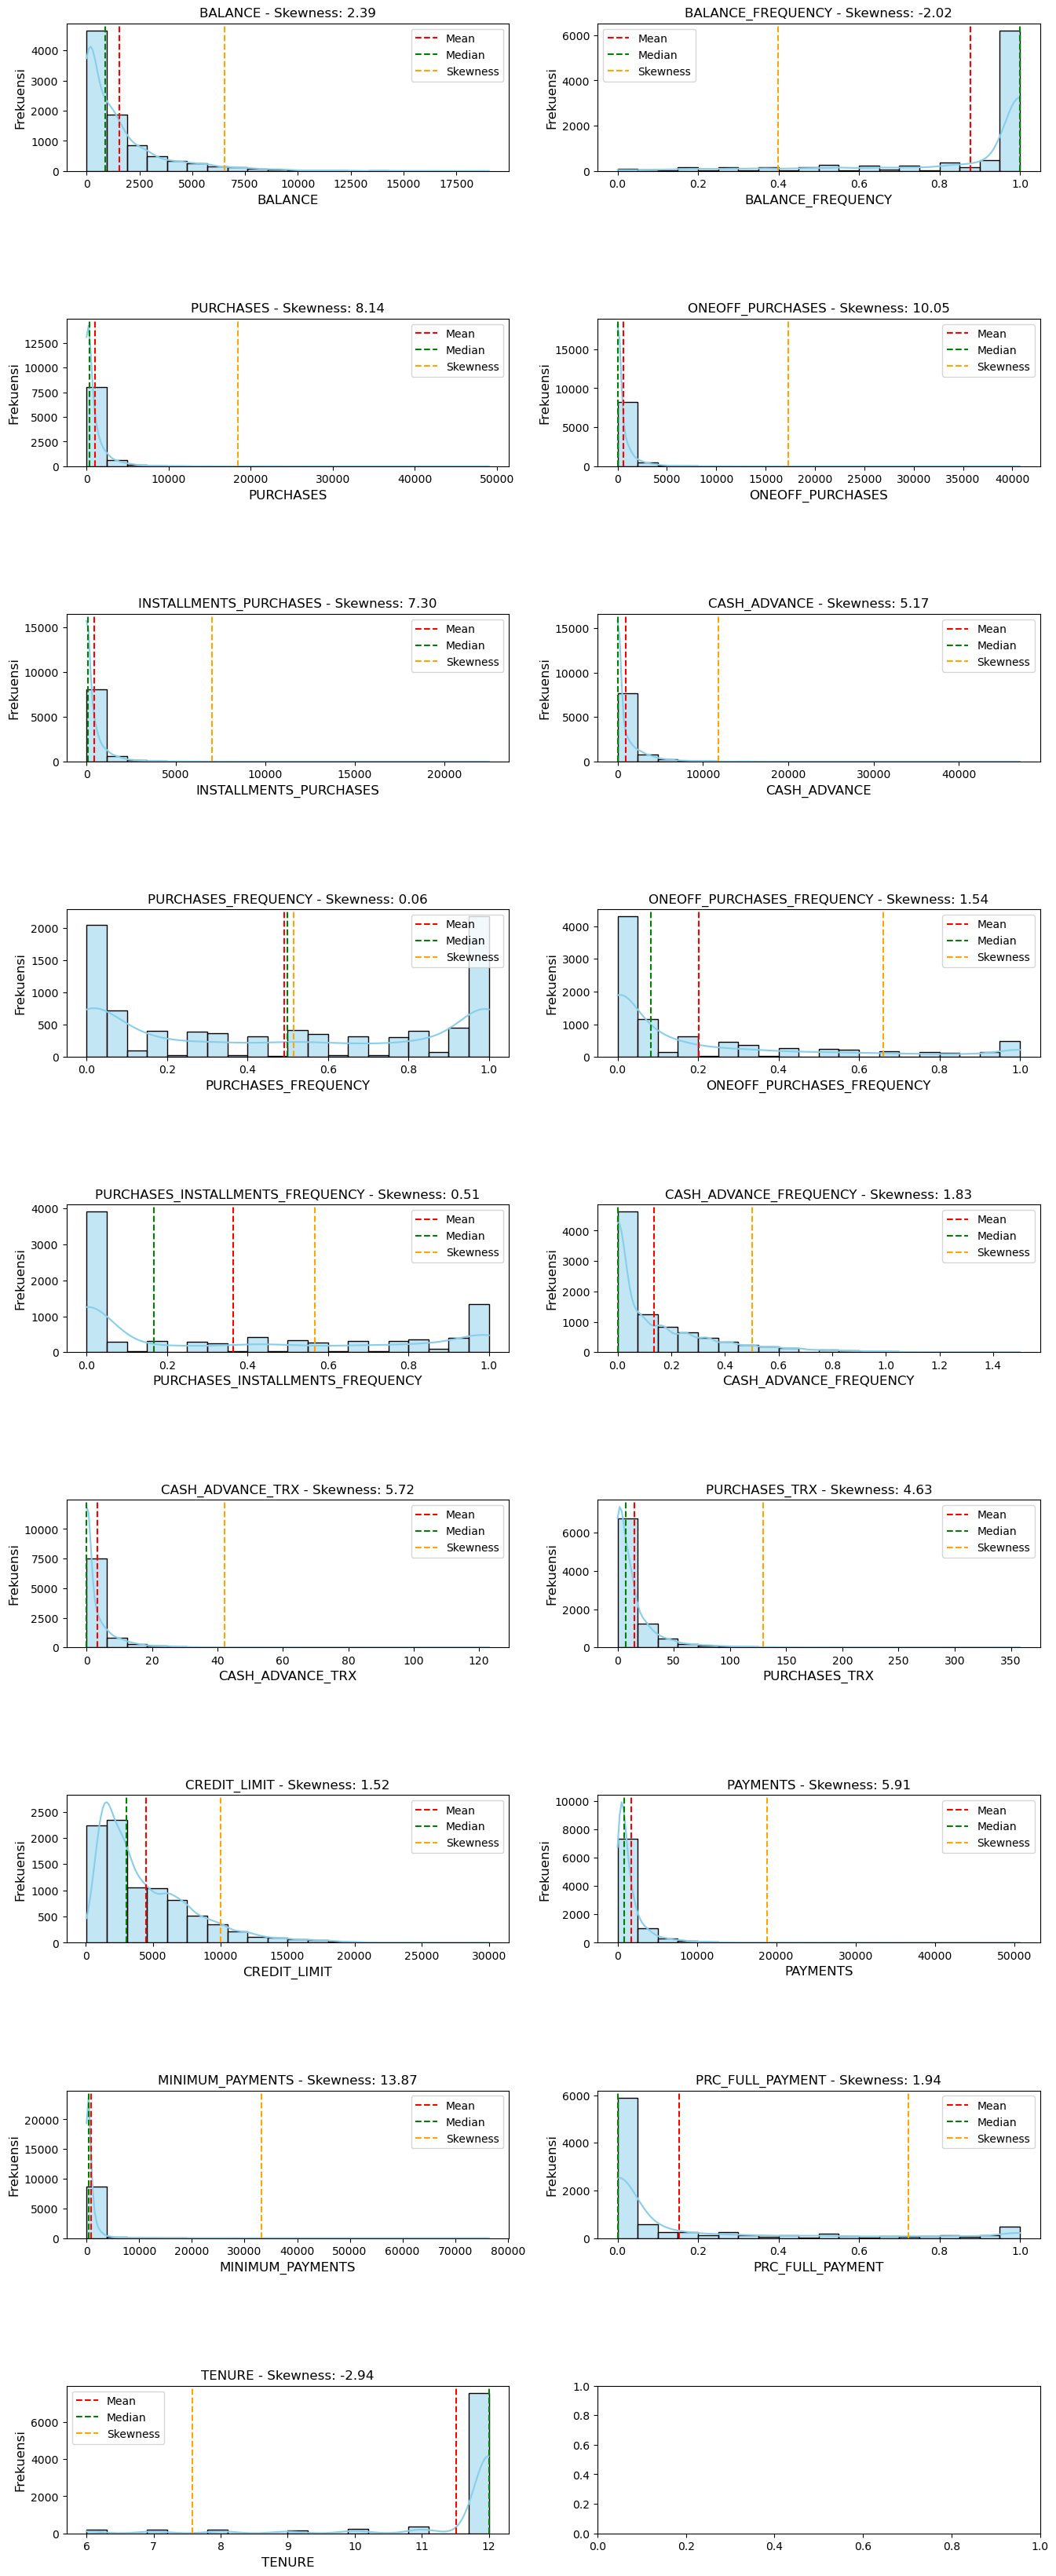

In [11]:
# Variabel yang ingin dianalisis
data = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Membuat subplot dengan figsize dan hspace yang lebih besar
fig, axes = plt.subplots(nrows=int(len(data) / 2) + 1, ncols=2, figsize=(16, 23))
fig.subplots_adjust(hspace=1, top=1.5)

# Iterasi untuk setiap variabel
for i, var in enumerate(data):
    row = i // 2
    col = i % 2

    # Membuat histogram dengan kde=True dan warna yang lebih kontras
    sns.histplot(df[var], kde=True, color='skyblue', bins=20, ax=axes[row, col])

    # Menandai skewness dengan garis vertikal
    skewness = df[var].skew()
    axes[row, col].axvline(x=df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col].axvline(x=df[var].median(), color='green', linestyle='--', label='Median')
    axes[row, col].axvline(x=df[var].mean() + (skewness * df[var].std()), color='orange', linestyle='--', label='Skewness')

    # Menambahkan label dan judul dengan font size yang lebih besar
    axes[row, col].set_title(f'{var} - Skewness: {skewness:.2f}', fontsize=12)
    axes[row, col].set_xlabel(var, fontsize=12)
    axes[row, col].set_ylabel('Frekuensi', fontsize=12)
    axes[row, col].legend(fontsize=10)

plt.show()

## Check Outlier

In [12]:
# Variabel yang ingin dianalisis
data_outlier = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

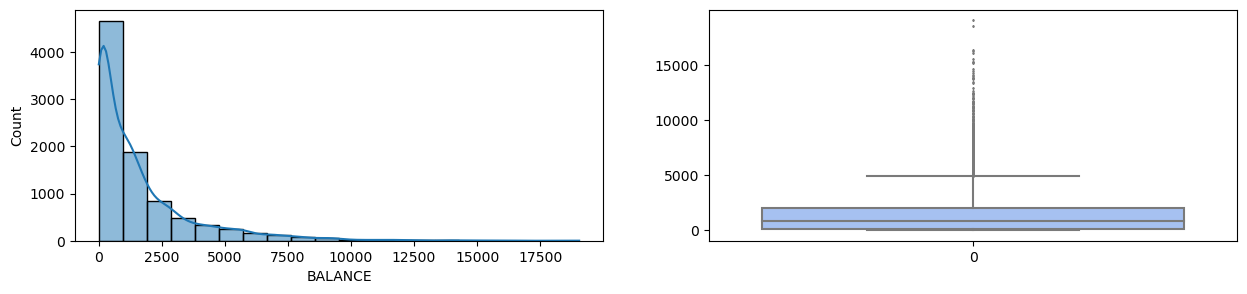

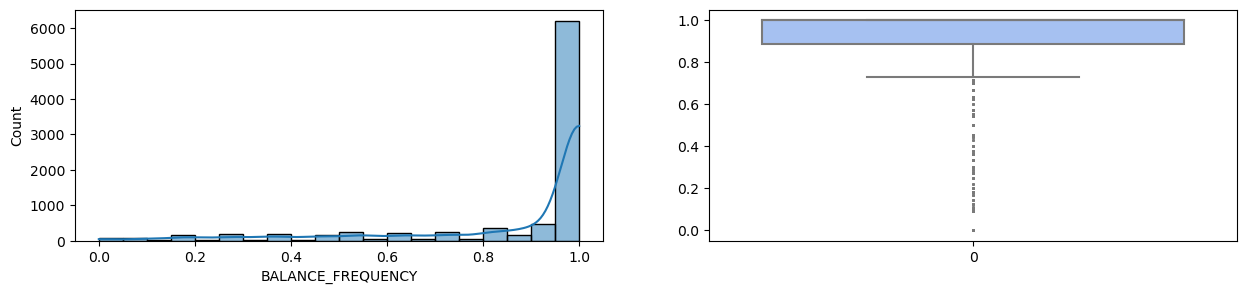

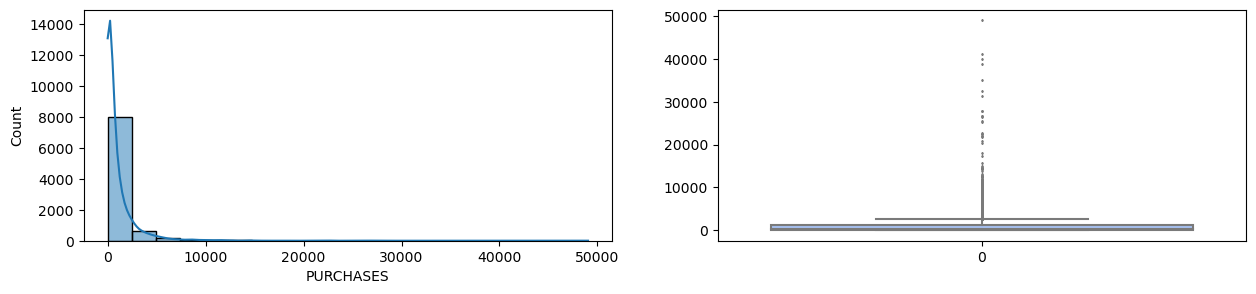

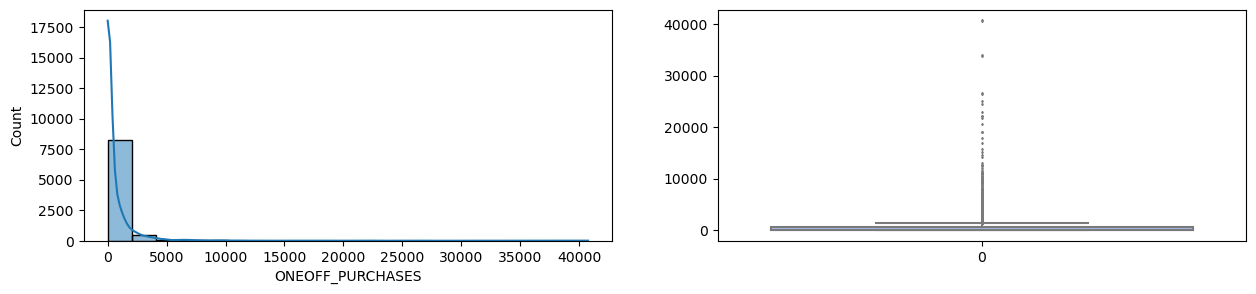

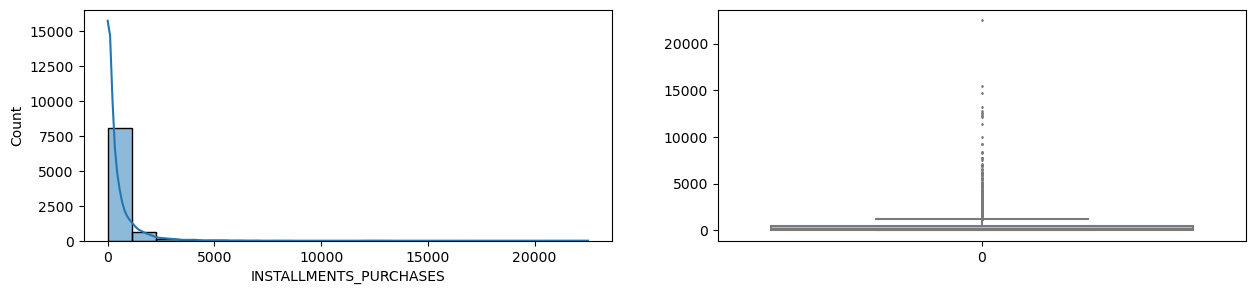

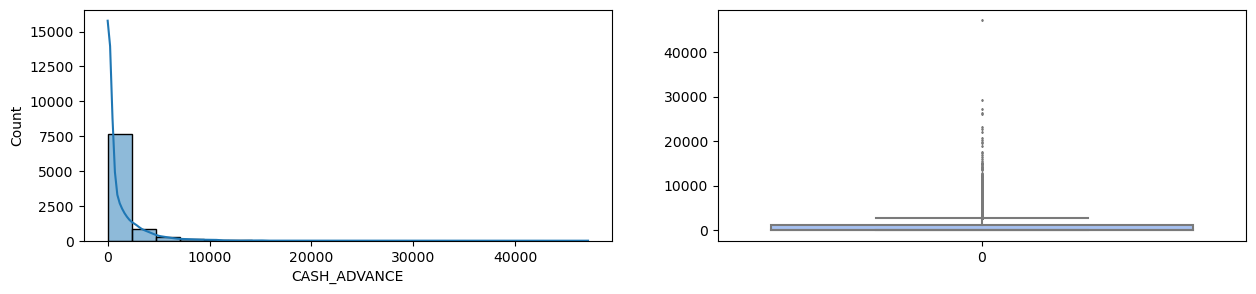

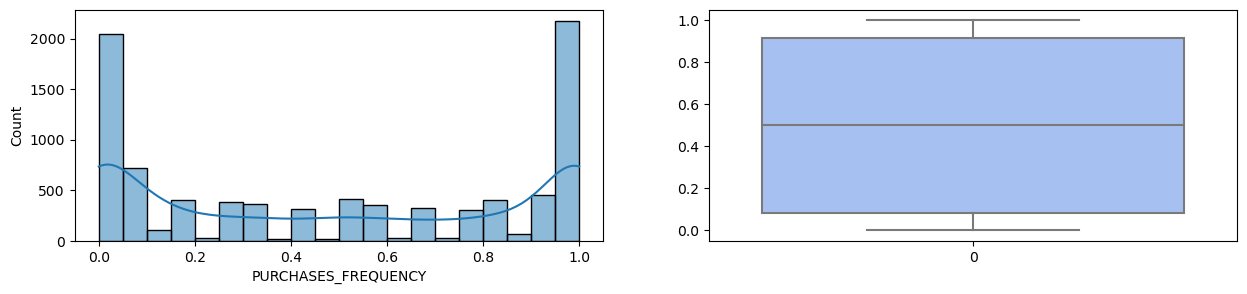

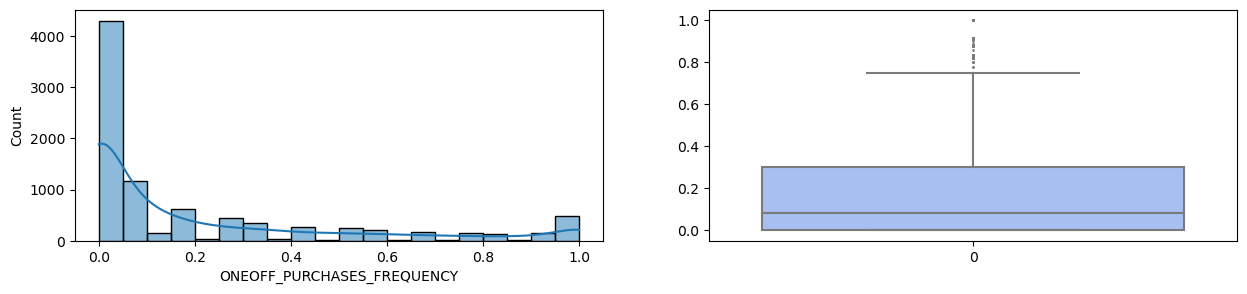

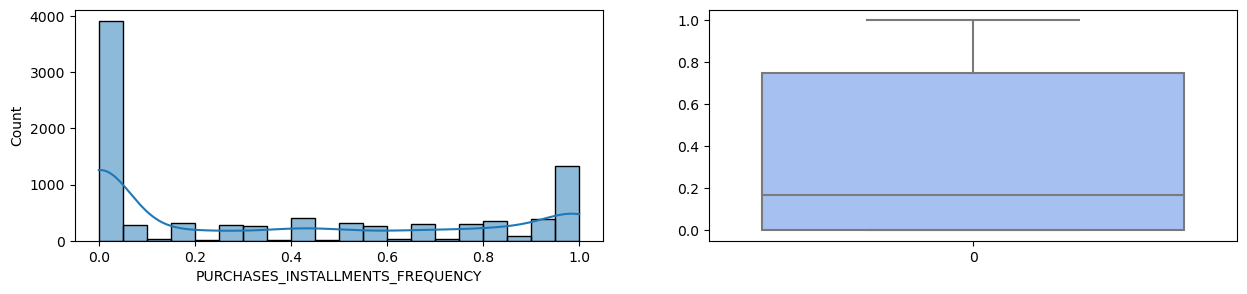

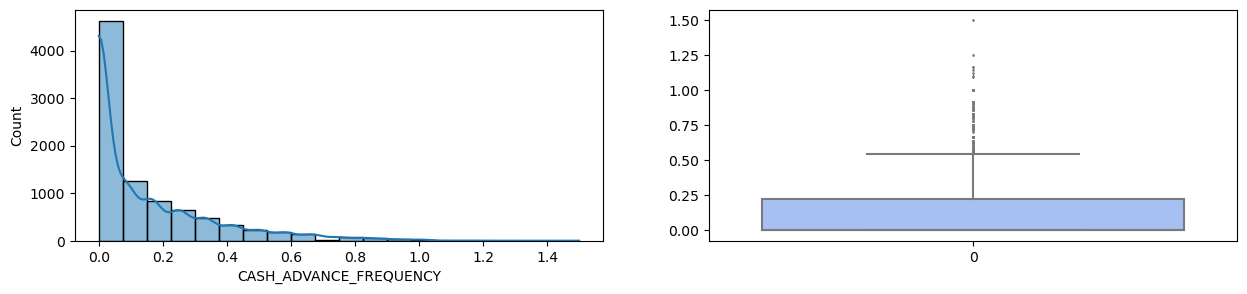

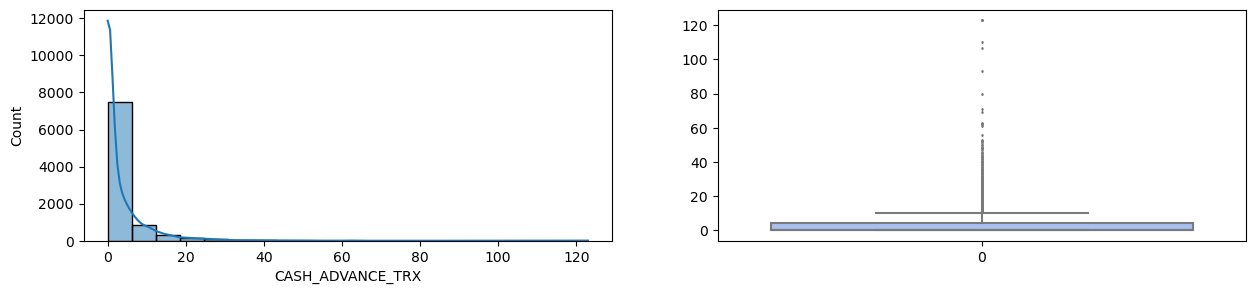

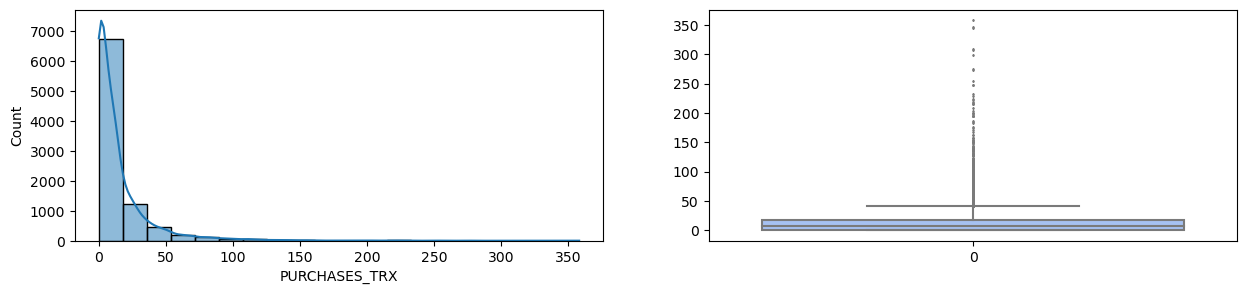

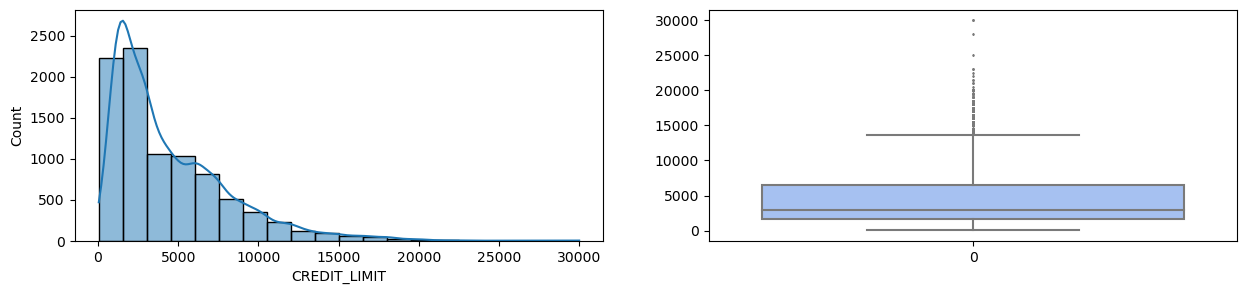

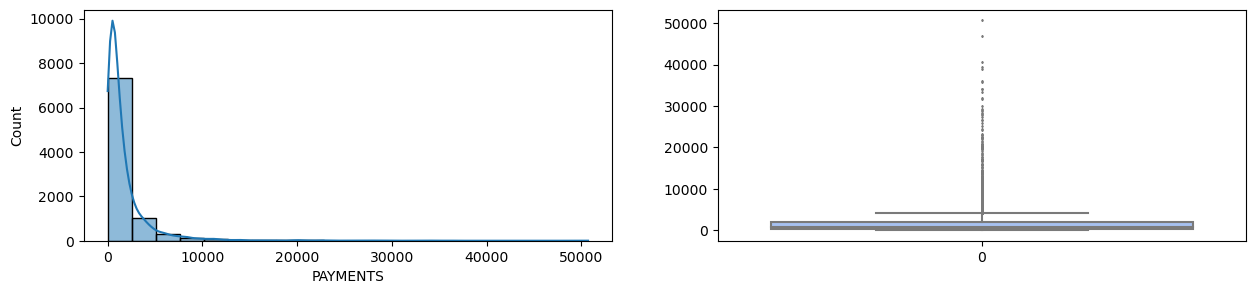

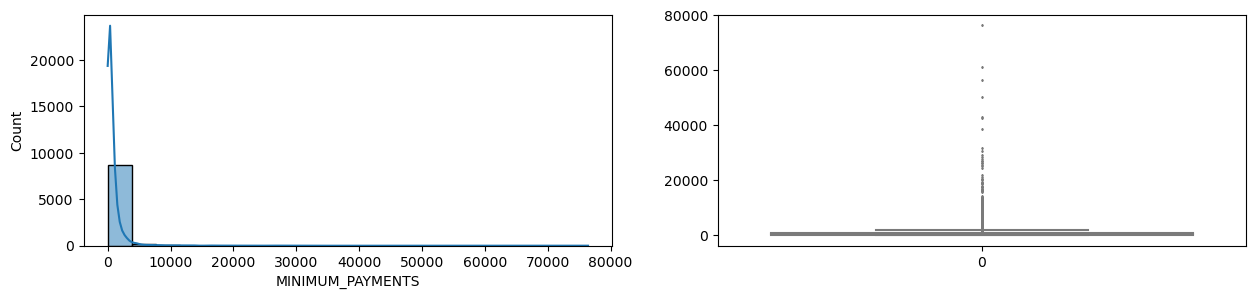

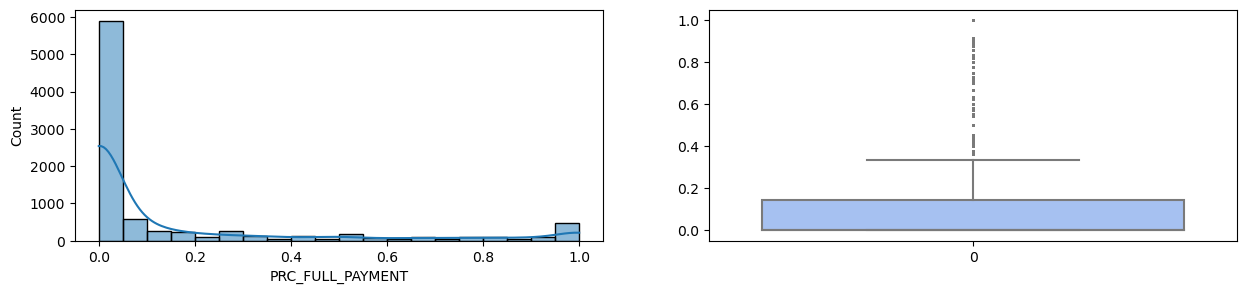

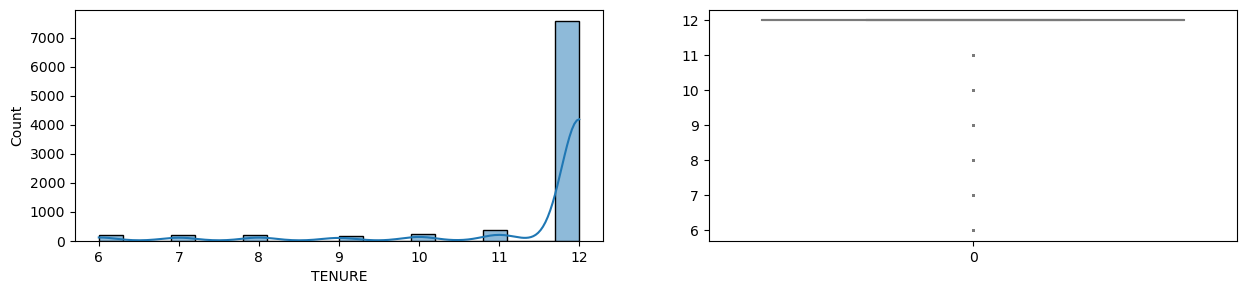

In [13]:
for i in data_outlier:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

## Feature Scaling

### Outier Handling

Censoring

mengubah data outlier menjadi max dan/atau min value

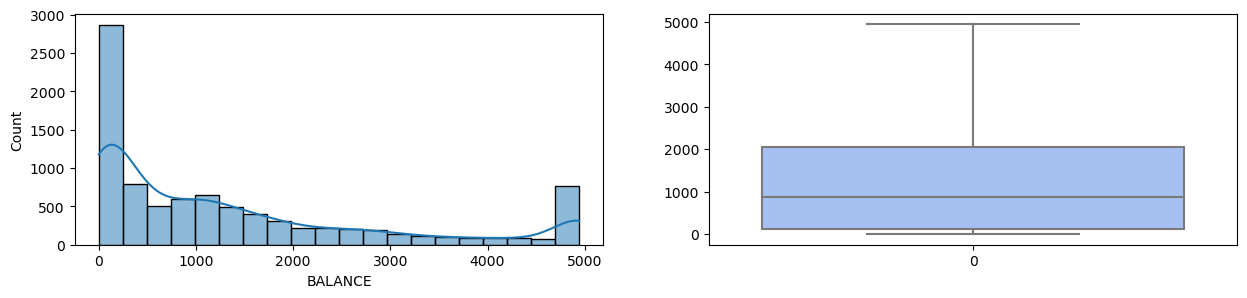

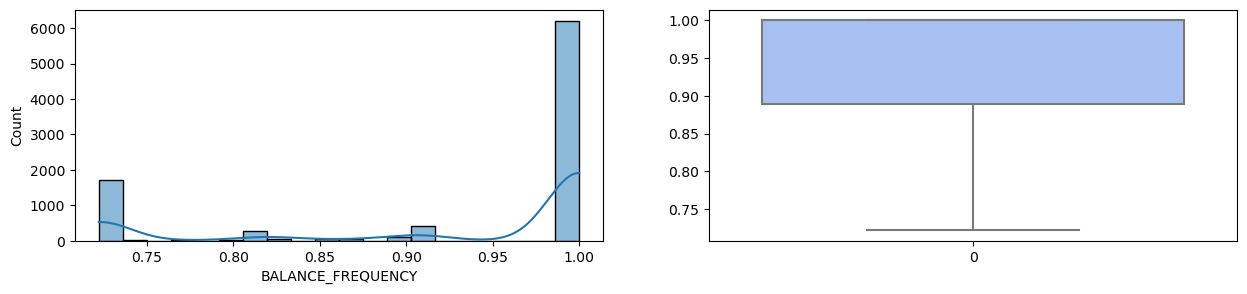

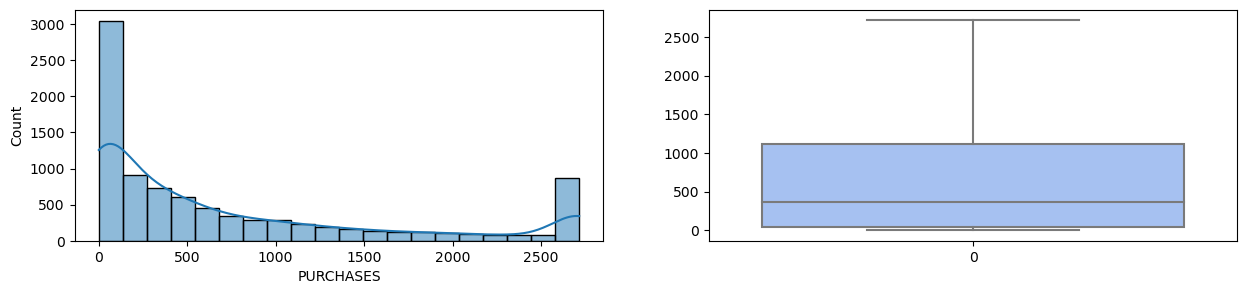

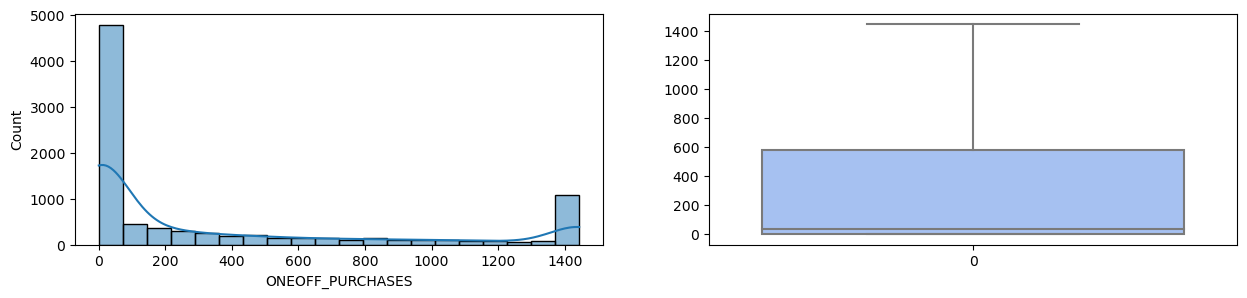

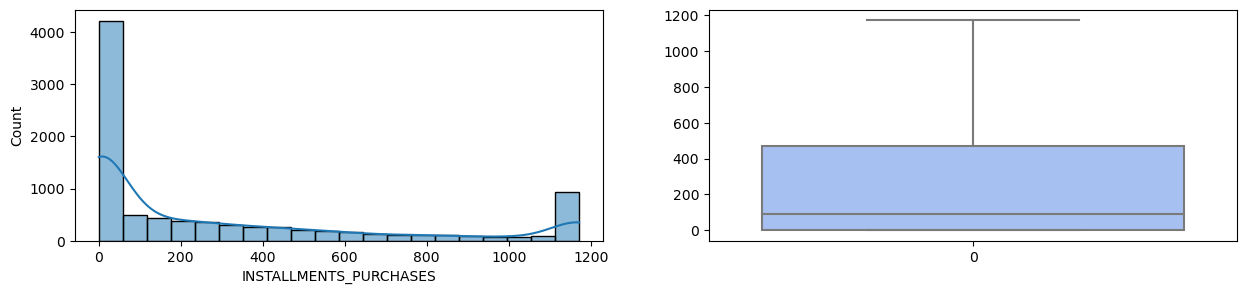

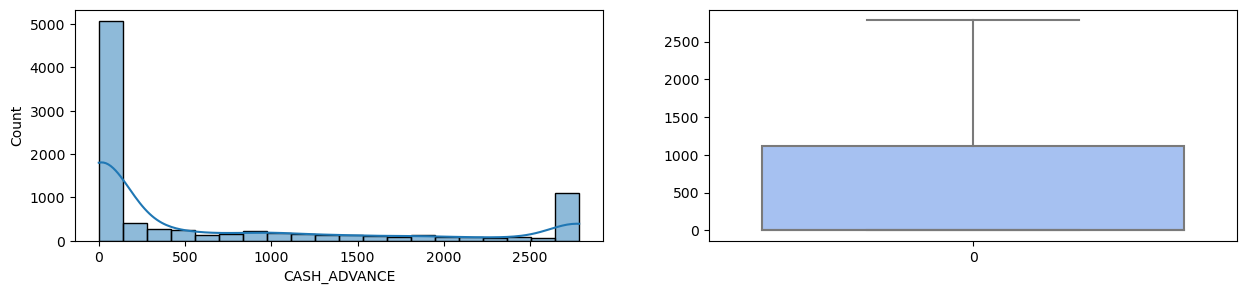

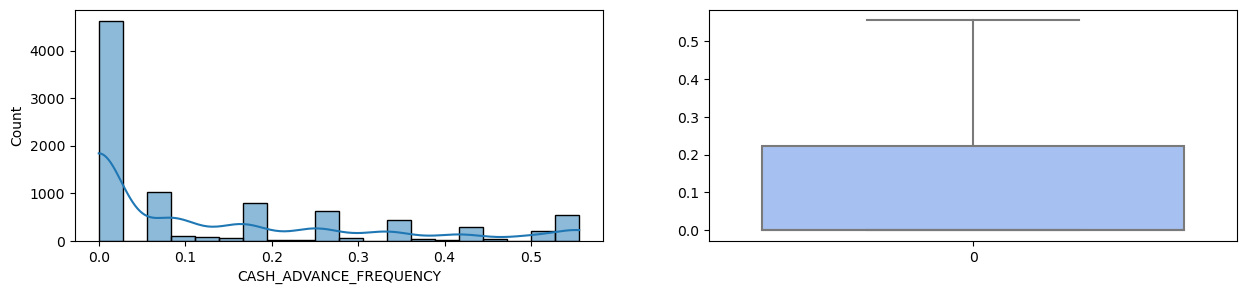

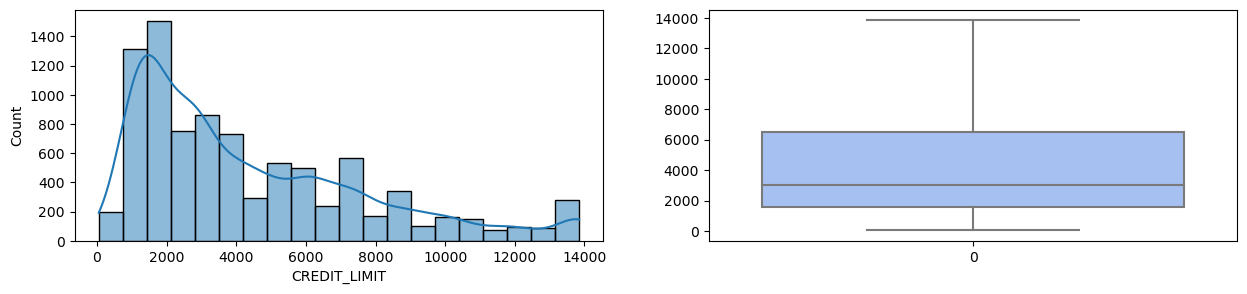

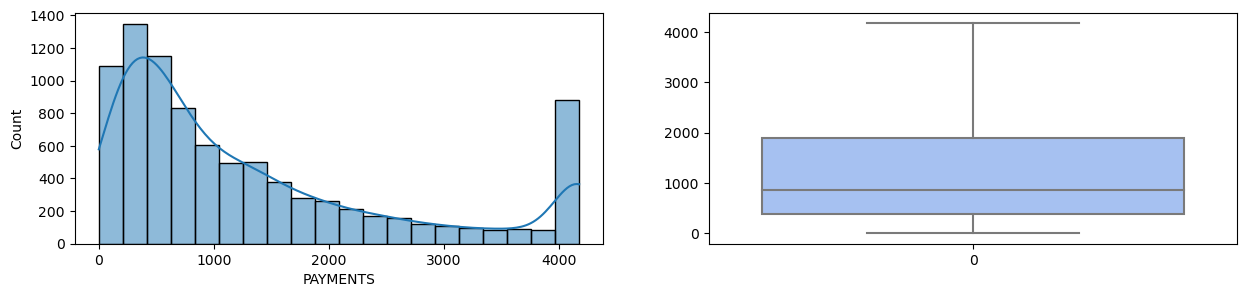

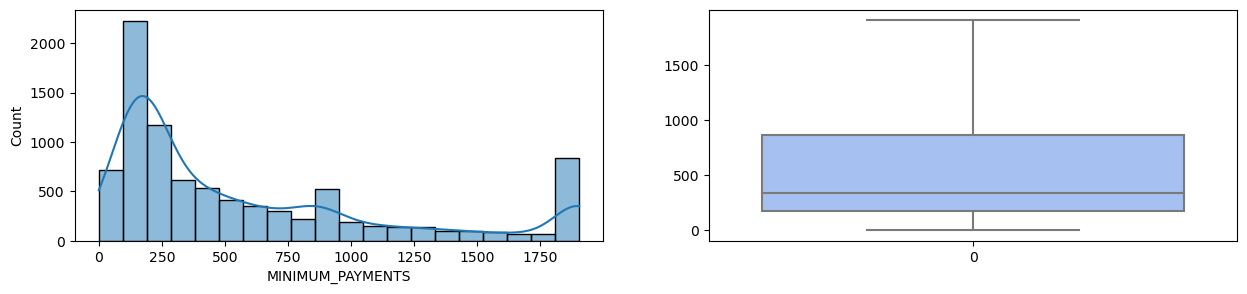

In [14]:
features_with_outliers = ['BALANCE','BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

for i in features_with_outliers:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Menghapus outlier dari data sebelum melakukan proses clustering dapat memberikan beberapa manfaat, terutama untuk meningkatkan kualitas dan interpretabilitas hasil clustering.

In [15]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Modeling K-Means

In [16]:
from sklearn.cluster import KMeans
# Pilih fitur yang akan digunakan untuk clustering
features = df.drop('CUST_ID', axis=1).columns

In [17]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [18]:
# Ambil subset data dengan fitur yang dipilih
selected_data = df[features]

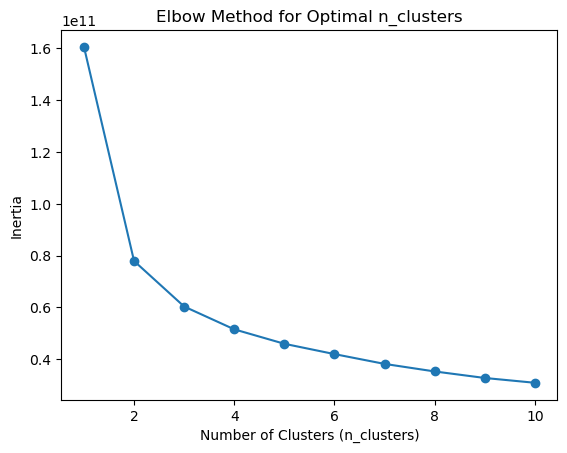

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Kumpulan nilai n_cluster yang akan diuji
n_clusters = range(1, 11)
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(selected_data)
    inertias.append(kmeans.inertia_)

# Plot metode elbow
plt.plot(n_clusters, inertias, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.show()

Elbow yang cocok untuk dijadikan n_cluster adalah 4. Hal ini dapat dilihat dari grafik inertia yang mengalami penurunan yang signifikan setelah k = 4. Penurunan inertia yang signifikan ini menunjukkan bahwa cluster-cluster yang terbentuk setelah k = 4 sudah cukup baik dalam memisahkan data.

## Silhouette Analysis

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Fit k-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42, max_iter=6)
kmeans.fit(selected_data)

# Calculate silhouette scores
silhouette_scores = silhouette_score(selected_data, kmeans.labels_)

# Print silhouette scores
print(silhouette_scores)

0.39959220716793104


In [21]:
# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

In [22]:
from sklearn.decomposition import PCA
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [23]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

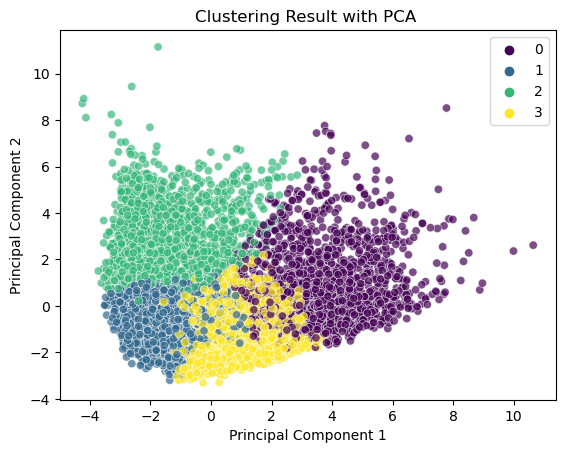

In [24]:
#Visualisasi hasil clustering
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title(f'Clustering Result with PCA ')  # Menggunakan f-string untuk menampilkan jumlah klaster
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

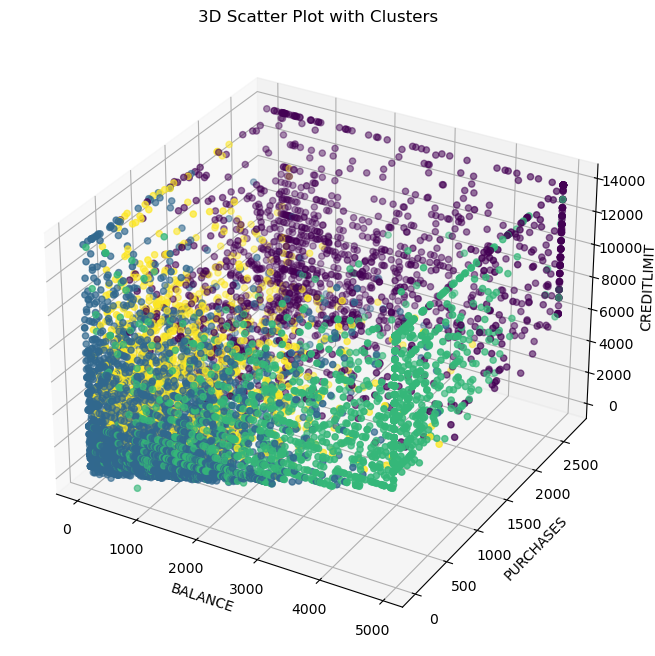

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['BALANCE'], df['PURCHASES'], df['CREDIT_LIMIT'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDITLIMIT')
plt.title('3D Scatter Plot with Clusters')
plt.show()

## Analisa Variabel Cluster

In [26]:
cluster0 = df[df['Cluster'] == 0 ]
cluster0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.0
mean,1882.095652,0.980065,2250.022813,1198.307269,694.820250,410.225841,0.903669,0.661491,0.638209,0.073728,1.964602,48.275601,6936.461326,2596.102011,685.913393,0.246745,11.876738,0.0
std,1672.956866,0.059958,592.746882,381.647347,461.430641,826.765271,0.163605,0.295002,0.368207,0.138822,5.349163,41.119454,3630.618527,1275.835914,609.104866,0.359153,0.650482,0.0
min,6.793588,0.722223,422.180000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,14.012997,0.000000,6.000000,0.0
25%,406.999359,1.000000,1834.857500,1013.555000,232.820000,0.000000,0.833333,0.416667,0.333333,0.000000,0.000000,23.000000,4000.000000,1480.966939,194.365962,0.000000,12.000000,0.0
50%,1286.725328,1.000000,2634.535000,1443.512500,777.585000,0.000000,1.000000,0.666667,0.750000,0.000000,0.000000,36.000000,6500.000000,2493.345458,415.932546,0.000000,12.000000,0.0
75%,3063.108676,1.000000,2715.872500,1443.512500,1171.593750,279.913433,1.000000,1.000000,1.000000,0.083333,1.000000,60.000000,9500.000000,4177.921543,1032.587611,0.416667,12.000000,0.0
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,1.000000,1.000000,0.555555,62.000000,358.000000,13850.000000,4177.921543,1904.229874,1.000000,12.000000,0.0


In [27]:
cluster1 = df[df['Cluster'] == 1 ]
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.0
mean,827.778465,0.891083,261.099249,208.177440,44.345568,415.545098,0.193277,0.117575,0.075480,0.096083,1.696444,3.314936,3099.281666,762.097738,413.044216,0.074608,11.445804,1.0
std,846.700197,0.128476,397.520760,350.849169,97.886278,653.350902,0.220660,0.191843,0.140463,0.122188,2.522021,4.592884,2530.590359,867.723696,386.013741,0.201259,1.419879,0.0
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,1.0
25%,69.357008,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,248.328728,152.164335,0.000000,12.000000,1.0
50%,615.726189,1.000000,90.390000,0.000000,0.000000,47.998873,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2400.000000,473.832445,276.845199,0.000000,12.000000,1.0
75%,1306.956431,1.000000,354.000000,279.505000,43.315000,614.806376,0.333333,0.166667,0.083333,0.166667,2.000000,5.000000,4000.000000,893.843006,565.171439,0.000000,12.000000,1.0
max,4942.927215,1.000000,2715.872500,1443.512500,996.660000,2784.552848,1.000000,1.000000,0.666667,0.555555,23.000000,54.000000,13850.000000,4177.921543,1904.229874,1.000000,12.000000,1.0


In [28]:
cluster2 = df[df['Cluster'] == 2 ]
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.0
mean,3328.255324,0.970916,304.217190,175.652472,107.491586,2234.151961,0.229306,0.098016,0.142623,0.373849,11.523547,4.792661,6496.618478,2058.416818,1166.636265,0.031792,11.422018,2.0
std,1490.847324,0.072391,502.477408,337.309696,245.797839,790.865668,0.317915,0.180564,0.275767,0.157740,11.167026,8.295887,3347.524741,1344.927386,581.691891,0.090391,1.420864,0.0
min,78.114579,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,2.0
25%,2007.570997,1.000000,0.000000,0.000000,0.000000,1808.701231,0.000000,0.000000,0.000000,0.250000,5.000000,0.000000,4000.000000,962.576047,654.638358,0.000000,12.000000,2.0
50%,3467.619262,1.000000,2.000000,0.000000,0.000000,2784.552848,0.083333,0.000000,0.000000,0.416667,9.000000,1.000000,6000.000000,1629.239381,1143.067027,0.000000,12.000000,2.0
75%,4942.927215,1.000000,425.690000,206.300000,70.660000,2784.552848,0.416667,0.125000,0.166667,0.555555,14.000000,7.000000,9000.000000,3308.781109,1835.600008,0.000000,12.000000,2.0
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,1.000000,1.000000,0.555555,123.000000,77.000000,13850.000000,4177.921543,1904.229874,1.000000,12.000000,2.0


In [29]:
cluster3 = df[df['Cluster'] == 3 ]
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.0
mean,503.264757,0.932207,731.646278,115.801510,547.479515,115.482469,0.858770,0.086558,0.790607,0.028239,0.525248,16.137511,3184.555679,858.920131,391.931002,0.302601,11.444545,3.0
std,735.473330,0.108219,551.984218,227.979241,344.435570,369.866945,0.177904,0.177703,0.223099,0.079867,1.641133,10.948666,2533.078459,764.581800,479.698309,0.365925,1.460297,0.0
min,0.000000,0.722223,12.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,3.0
25%,41.783271,0.888889,324.150000,0.000000,272.310000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,10.000000,1500.000000,330.201260,141.369243,0.000000,12.000000,3.0
50%,129.148757,1.000000,561.430000,0.000000,454.200000,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,12.000000,2500.000000,626.440067,176.621469,0.090909,12.000000,3.0
75%,786.401883,1.000000,989.307500,125.347500,787.732500,0.000000,1.000000,0.083333,1.000000,0.000000,0.000000,19.000000,4000.000000,1142.654875,408.236398,0.600000,12.000000,3.0
max,4942.927215,1.000000,2715.872500,1440.140000,1171.593750,2784.552848,1.000000,1.000000,1.000000,0.555555,16.000000,111.000000,13850.000000,4177.921543,1904.229874,1.000000,12.000000,3.0


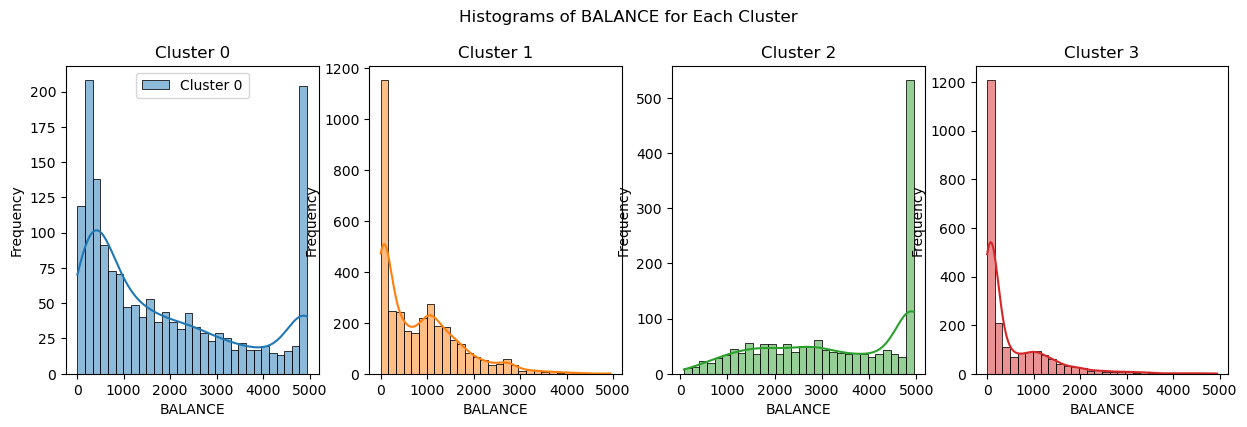

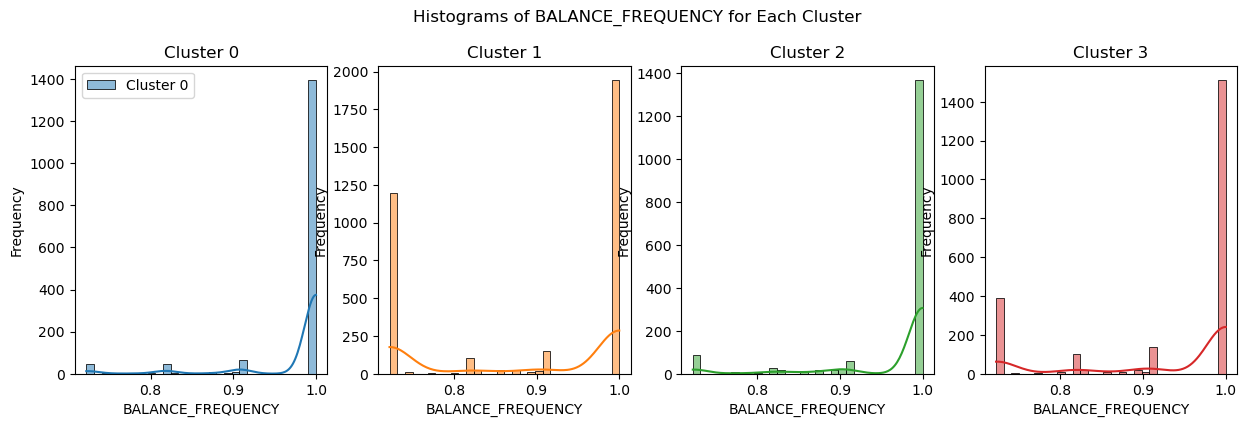

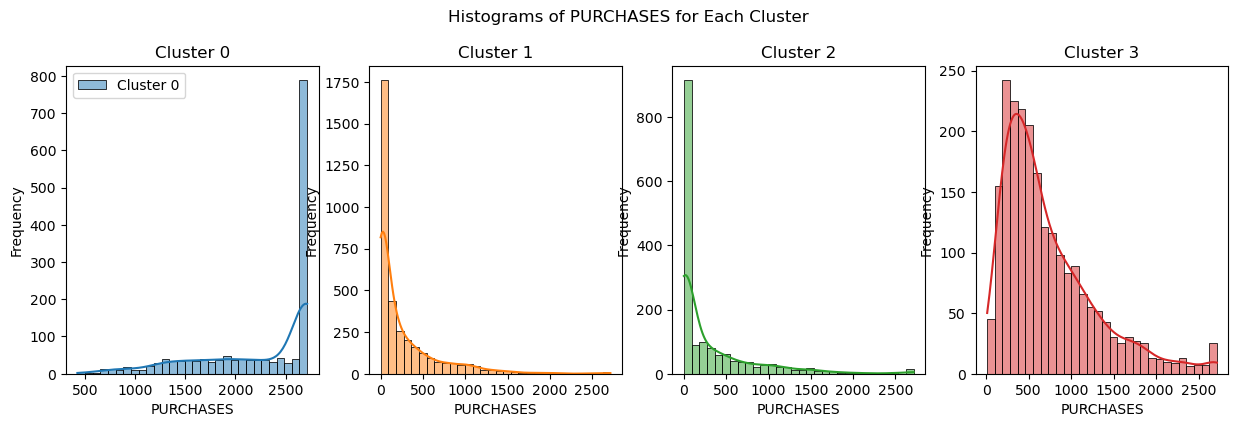

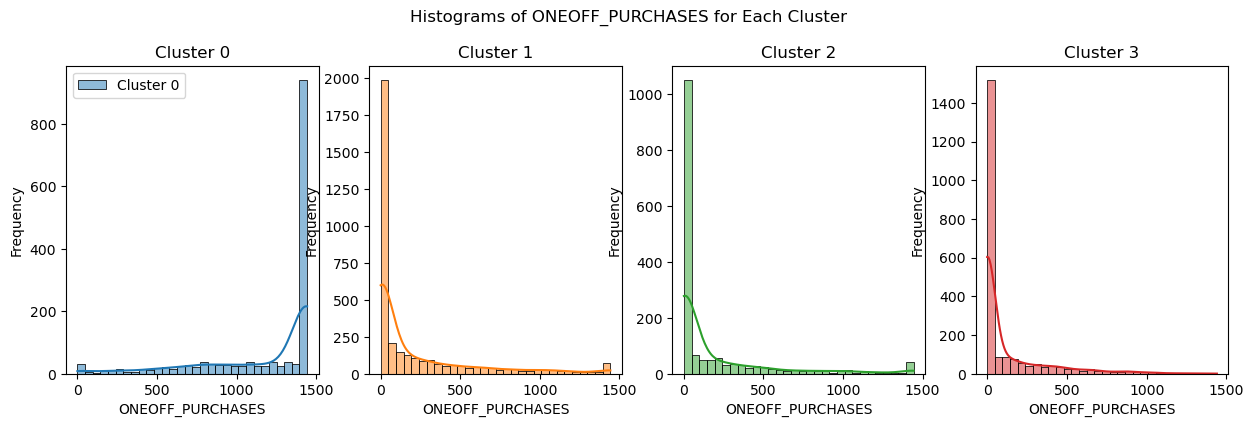

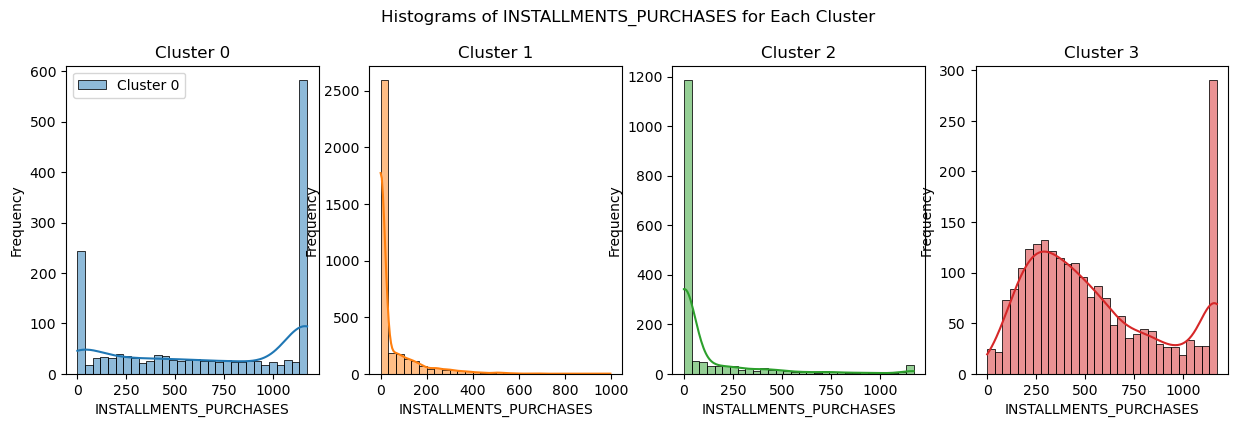

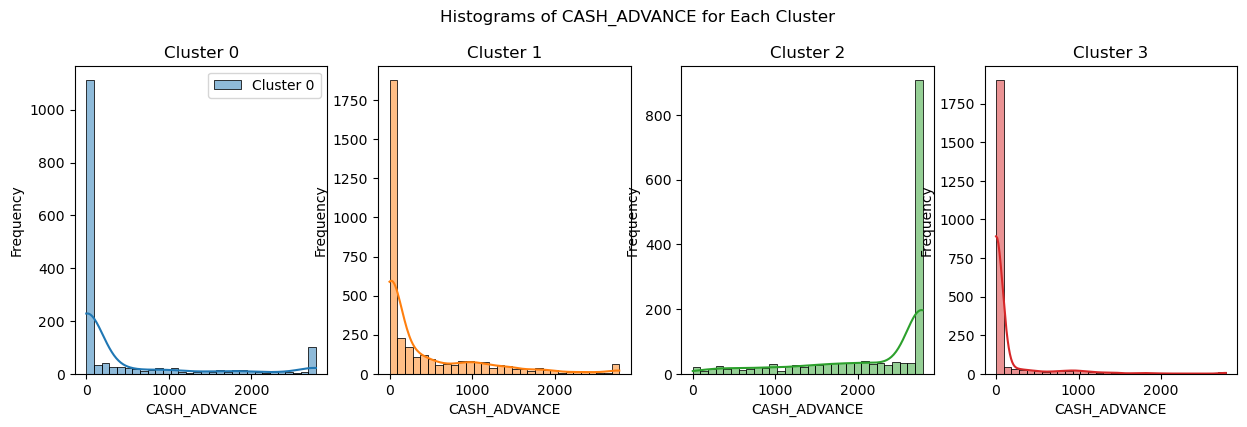

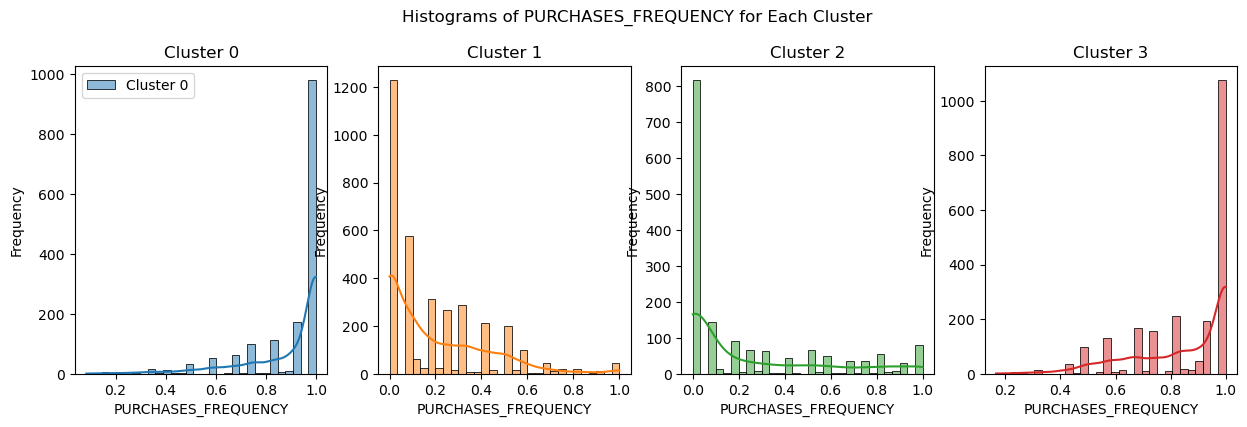

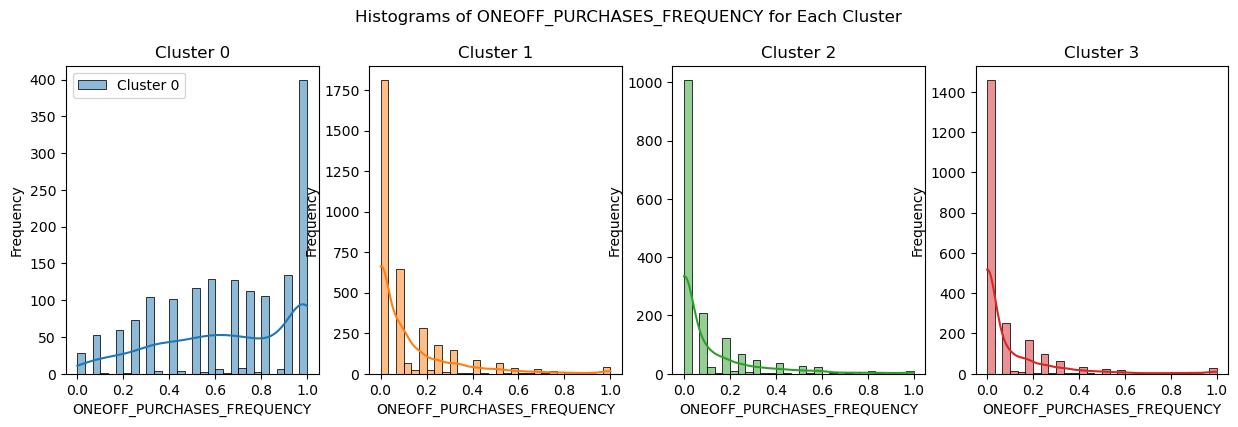

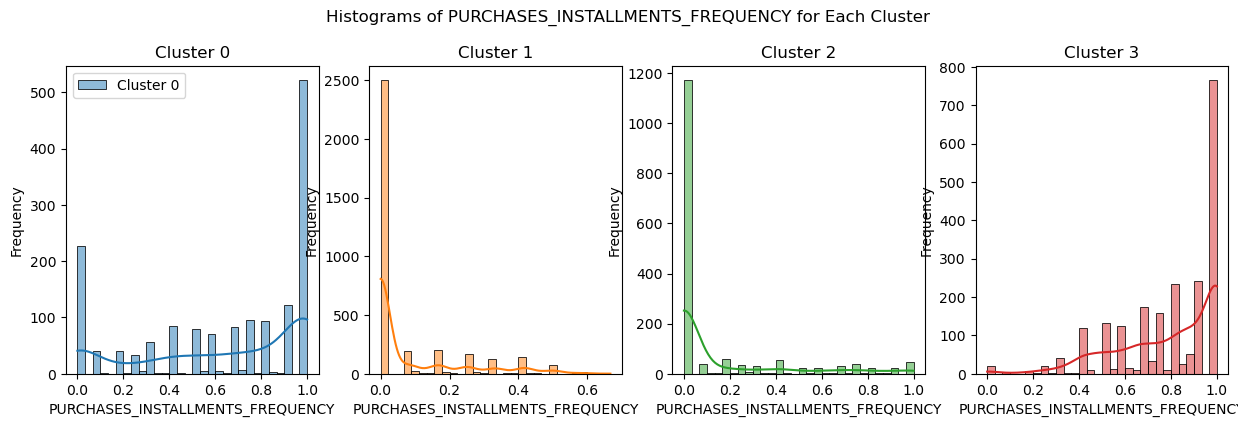

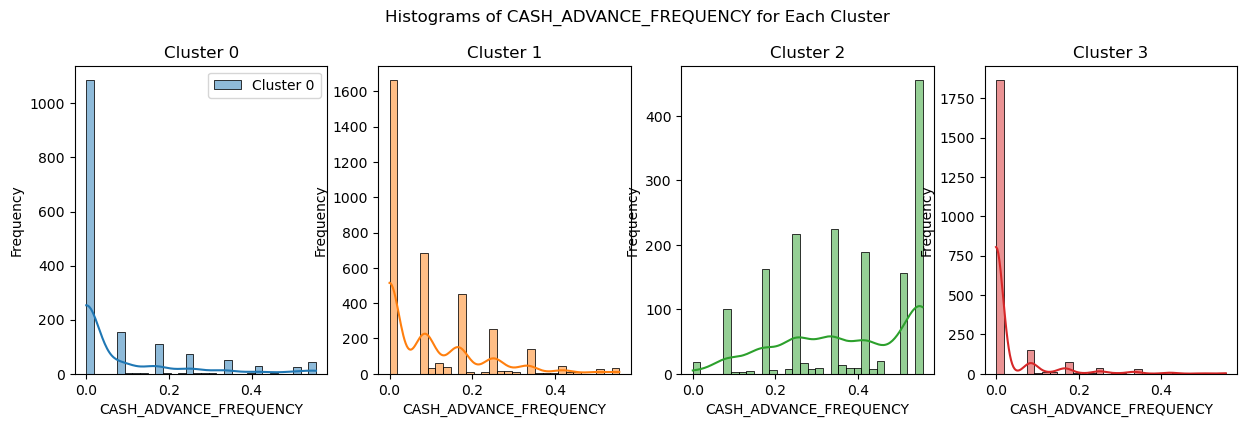

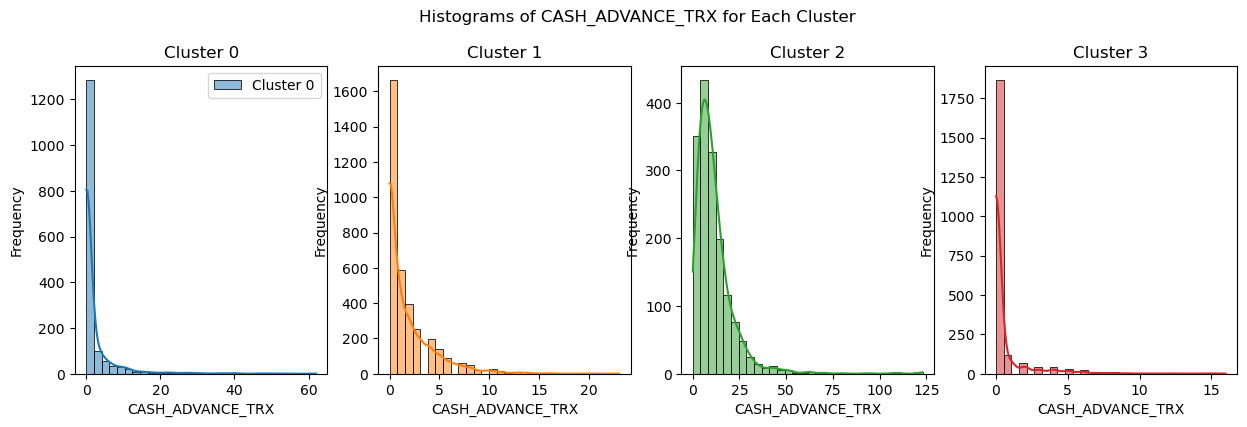

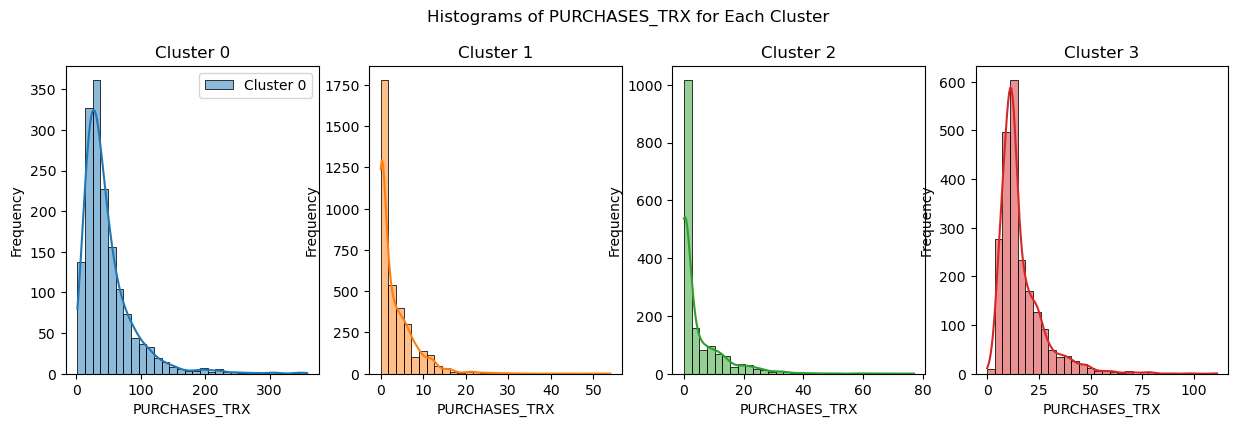

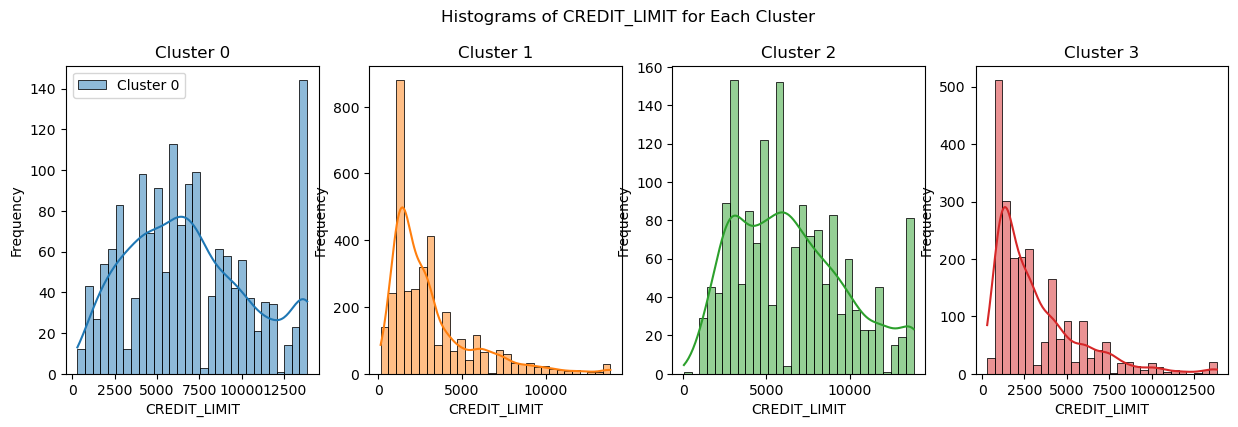

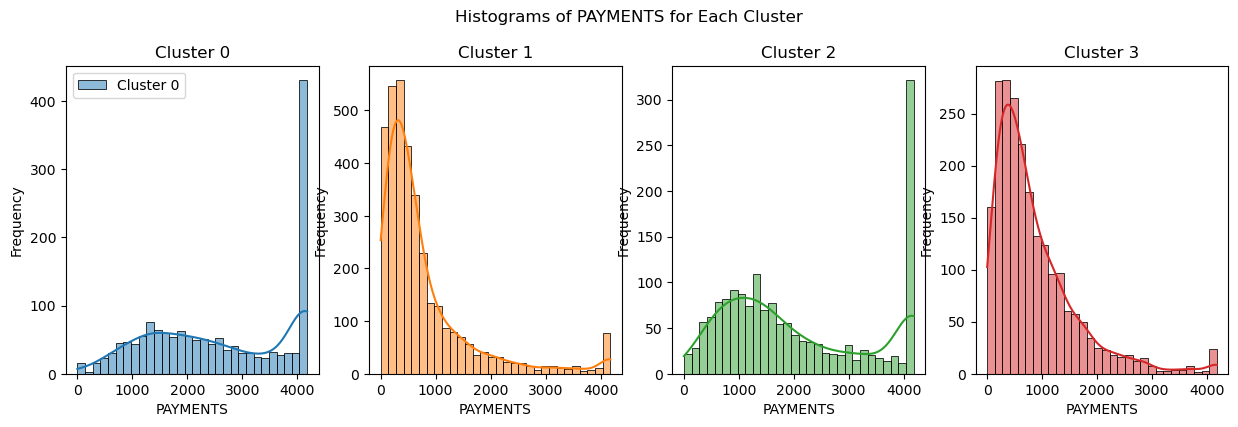

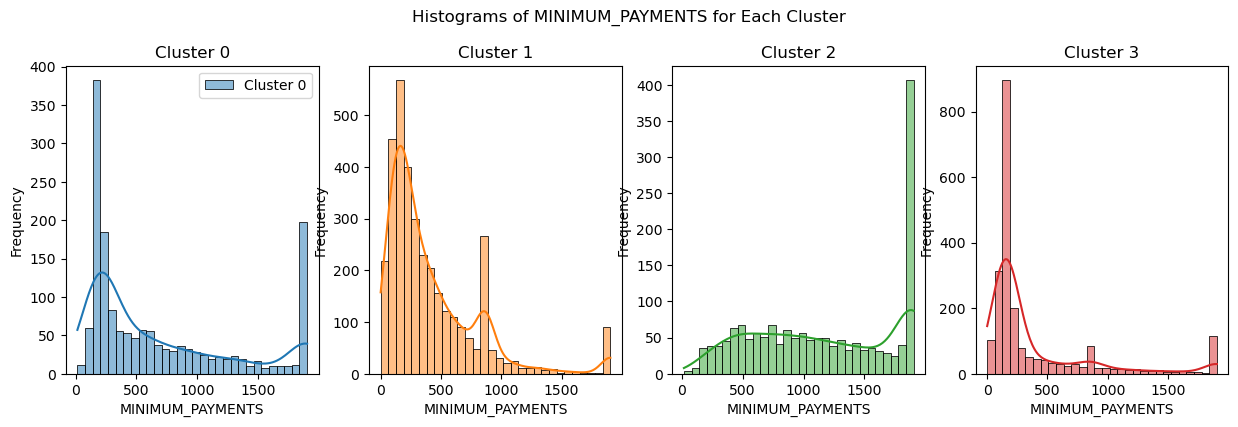

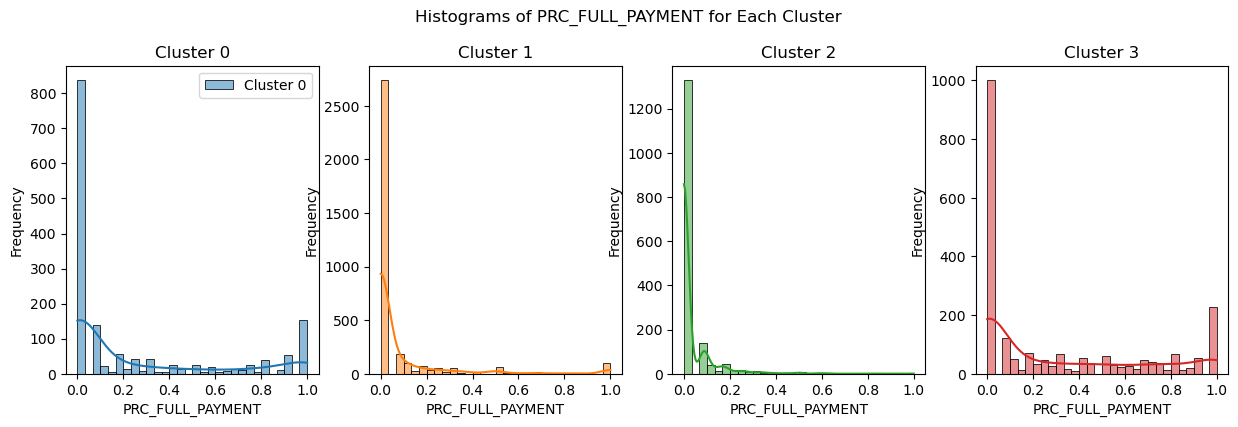

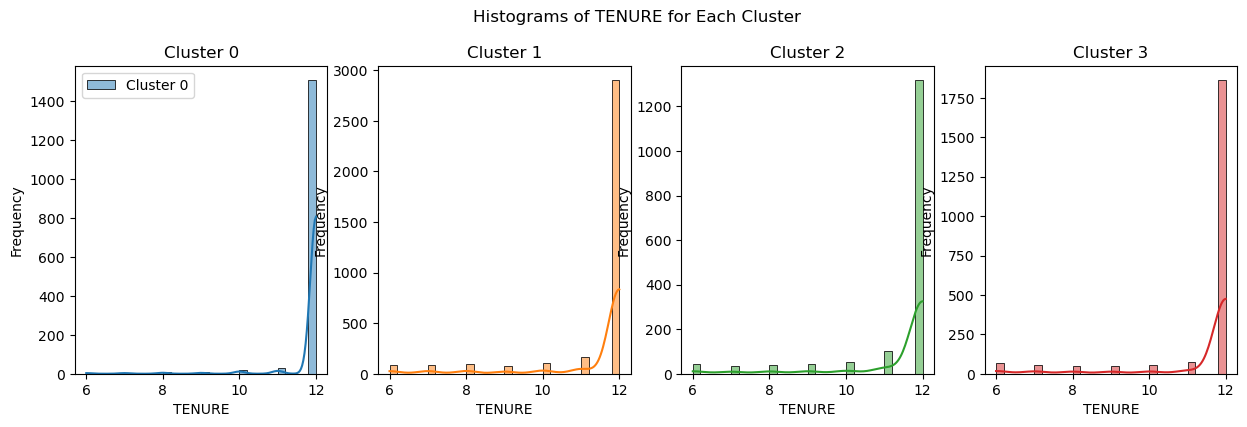

In [30]:
attributes = df.columns[1:-1]  # Exclude 'CUST_ID' dan 'Cluster'
num_clusters = 4
# Membuat histogram untuk masing-masing atribut dalam masing-masing klaster
for attribute in attributes:
    # Membuat subplots untuk masing-masing klaster
    fig, axes = plt.subplots(ncols=num_clusters, figsize=(15, 4))
    
    # Loop melalui setiap klaster dan membuat histogram untuk atribut tertentu
    for cluster_label in range(num_clusters):
        # Pilih data untuk klaster tertentu
        cluster_data = df[df['Cluster'] == cluster_label]
        
        # Plot histogram untuk atribut tertentu pada subplot yang sesuai
        sns.histplot(cluster_data[attribute], bins=30, kde=True, ax=axes[cluster_label], color=f'C{cluster_label}', label=f'Cluster {cluster_label}')
        
        # Menambahkan judul dan label pada subplot
        axes[cluster_label].set_title(f'Cluster {cluster_label}')
        axes[cluster_label].set_xlabel(attribute)
        axes[cluster_label].set_ylabel('Frequency')
        
        # Menambahkan legenda pada subplot pertama
        if cluster_label == 0:
            axes[cluster_label].legend()
    
    # Menampilkan judul keseluruhan
    plt.suptitle(f'Histograms of {attribute} for Each Cluster', y=1.02)
    
    # Menampilkan plot
    plt.show()


### Kesimpulan dari Analisis K-Means Clustering

#### Cluster 0: Moderate Activity, Low Cash Advance
- **BALANCE:** Tinggi, menunjukkan saldo yang cenderung besar.
- **PURCHASES:** Rata-rata tinggi, menunjukkan aktivitas pembelian yang moderat.
- **CASH_ADVANCE:** Rata-rata rendah, menunjukkan penggunaan tunai yang tidak signifikan.
- **CREDIT_LIMIT:** Tinggi, menunjukkan batas kredit yang besar.
- **PAYMENTS:** Tinggi, menunjukkan jumlah pembayaran yang signifikan.
- **TENURE:** Rata-rata, menunjukkan jangka waktu penggunaan kartu kredit yang biasa.

#### Cluster 1: Low Credit Limit, Low Activity
- **BALANCE:** Rata-rata rendah, menunjukkan saldo yang kecil.
- **PURCHASES:** Rata-rata rendah, menunjukkan aktivitas pembelian yang minim.
- **CASH_ADVANCE:** Rata-rata tinggi, menunjukkan penggunaan tunai yang signifikan.
- **CREDIT_LIMIT:** Rata-rata rendah, menunjukkan batas kredit yang kecil.
- **PAYMENTS:** Rata-rata rendah, menunjukkan jumlah pembayaran yang minim.
- **TENURE:** Rata-rata, menunjukkan jangka waktu penggunaan kartu kredit yang biasa.

#### Cluster 2: High Credit Limit, High Activity
- **BALANCE:** Tinggi, menunjukkan saldo yang cenderung besar.
- **PURCHASES:** Tinggi, menunjukkan aktivitas pembelian yang tinggi.
- **CASH_ADVANCE:** Tinggi, menunjukkan penggunaan tunai yang tinggi.
- **CREDIT_LIMIT:** Tinggi, menunjukkan batas kredit yang besar.
- **PAYMENTS:** Tinggi, menunjukkan jumlah pembayaran yang tinggi.
- **TENURE:** Rata-rata, menunjukkan jangka waktu penggunaan kartu kredit yang biasa.

#### Cluster 3: Low Balance, Low Activity, Low Credit Limit
- **BALANCE:** Rata-rata rendah, menunjukkan saldo yang kecil.
- **PURCHASES:** Rata-rata rendah, menunjukkan aktivitas pembelian yang minim.
- **CASH_ADVANCE:** Rata-rata rendah, menunjukkan penggunaan tunai yang minim.
- **CREDIT_LIMIT:** Rata-rata rendah, menunjukkan batas kredit yang kecil.
- **PAYMENTS:** Rata-rata rendah, menunjukkan jumlah pembayaran yang minim.
- **TENURE:** Rata-rata, menunjukkan jangka waktu penggunaan kartu kredit yang biasa.
